# Pre-embedding test


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
csv_files = [
    'data/ablation_tempTopP_froth.csv',
    'data/ablation_tempTopP_towels.csv',
    'data/ablation_tempTopP_time.csv',
    'data/ablation_tempTopP_powder.csv',
    'data/ablation_tempTopP_exercise.csv',
    'data/ablation_topic_towels.csv',
    'data/ablation_topic_powder.csv',
    'data/ablation_topic_time.csv',
    'data/ablation_topic_exercise.csv',
    'data/ablation_topic_froth.csv'
]

In [18]:
# Initialize a dictionary to store the total length and count of strings for each column in each file
file_column_lengths = {}

In [19]:
# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Initialize a dictionary for the current file
    file_column_lengths[file] = {}
    
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Filter out NaN values and non-string values
        valid_strings = df[column].dropna().apply(lambda x: x if isinstance(x, str) else None).dropna()
        
        # Calculate the length of each valid string in the column
        lengths = valid_strings.apply(len)
        
        # Update the total length, count, and median for the column in the current file
        file_column_lengths[file][column] = {
            'total_length': lengths.sum(),
            'count': lengths.count(),
            'median_length': lengths.median() if lengths.count() > 0 else 0
        }

In [20]:
# Calculate the average length/median for each column in each file
file_average_lengths = {
    file: {column: {
        'average_length': data['total_length'] / data['count'] if data['count'] > 0 else 0,
        'median_length': data['median_length']
    } for column, data in columns.items()}
    for file, columns in file_column_lengths.items()
}

File: data/ablation_tempTopP_froth.csv


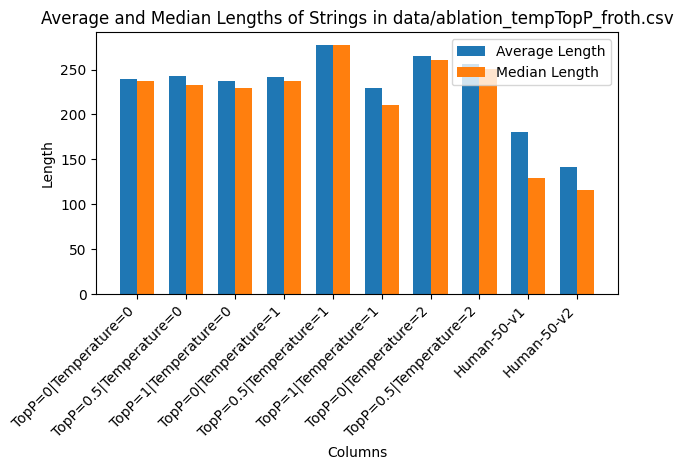

File: data/ablation_tempTopP_towels.csv


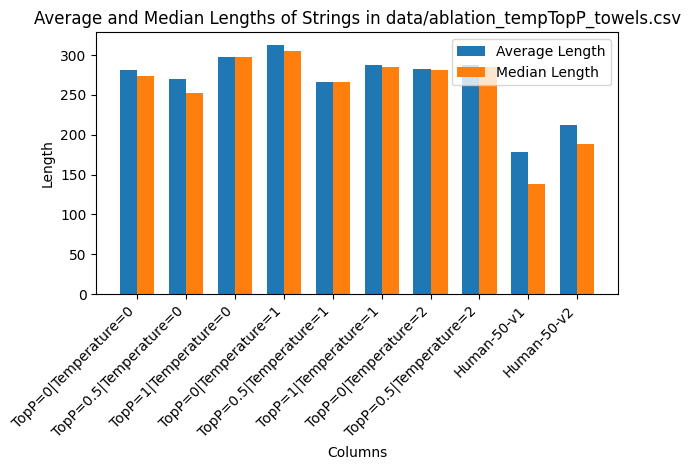

File: data/ablation_tempTopP_time.csv


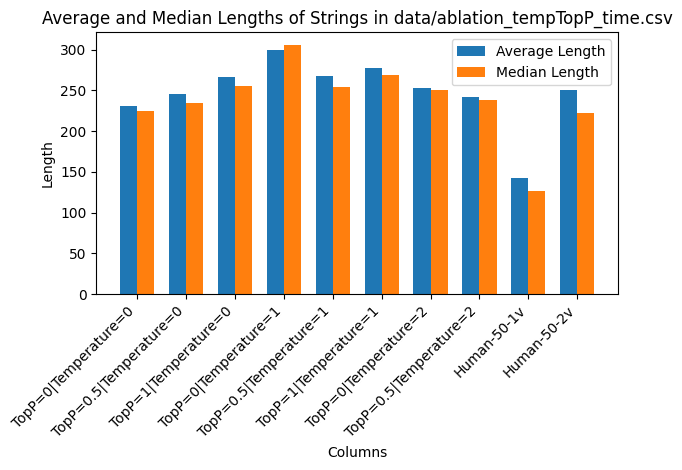

File: data/ablation_tempTopP_powder.csv


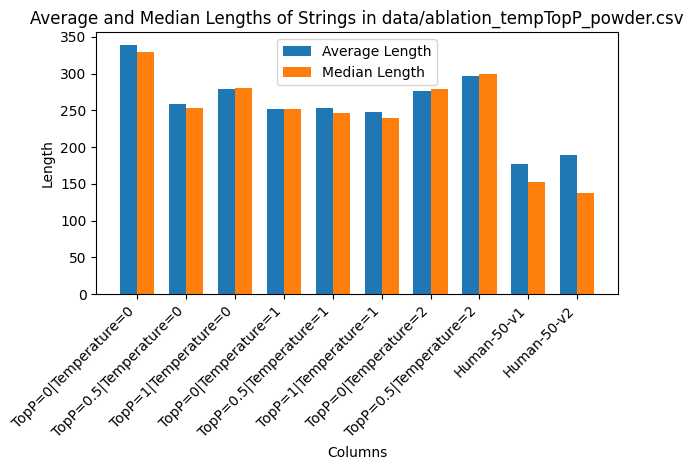

File: data/ablation_tempTopP_exercise.csv


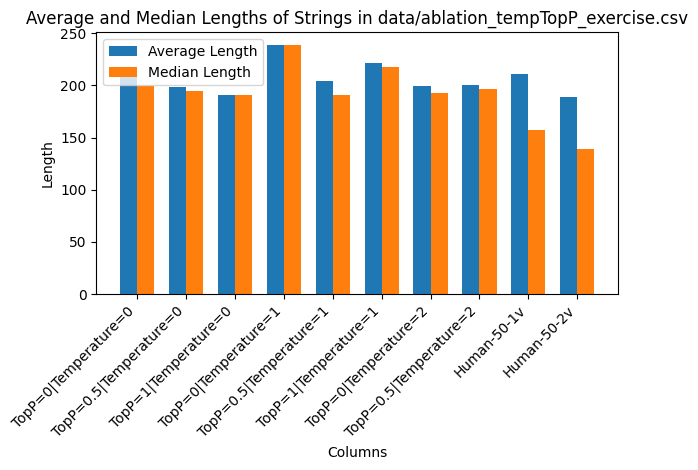

File: data/ablation_topic_towels.csv


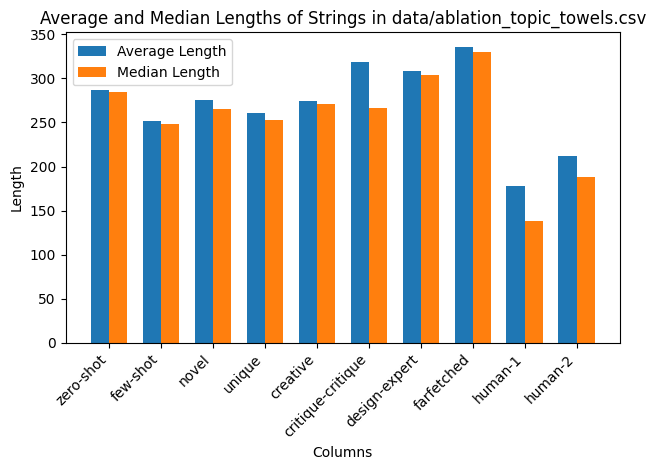

File: data/ablation_topic_powder.csv


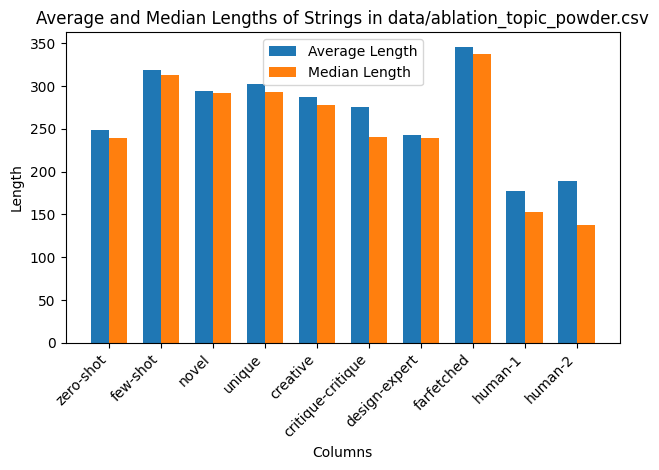

File: data/ablation_topic_time.csv


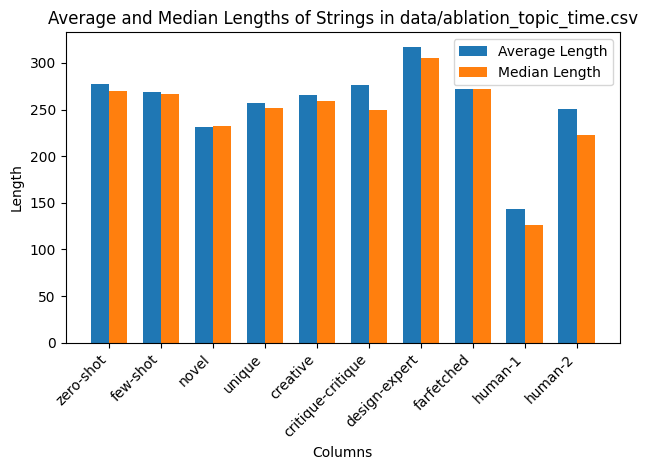

File: data/ablation_topic_exercise.csv


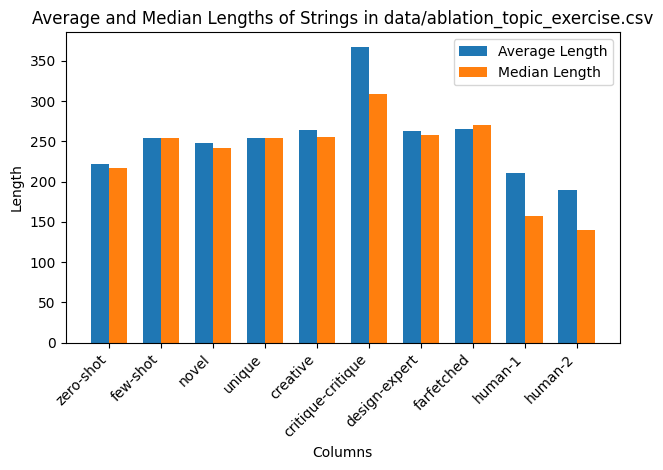

File: data/ablation_topic_froth.csv


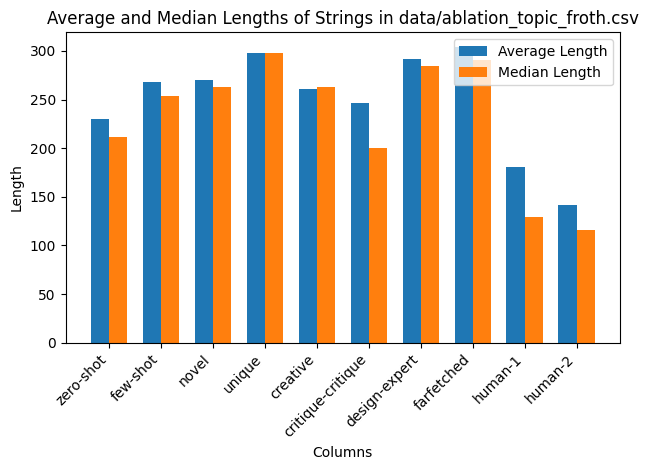

In [25]:
# Display the average and median lengths via bar charts
for file, columns in file_average_lengths.items():
    print(f"File: {file}")
    avg_lengths = []
    med_lengths = []
    col_names = []
    
    for column, lengths in columns.items():
        avg_lengths.append(lengths['average_length'])
        med_lengths.append(lengths['median_length'])
        col_names.append(column)
    
    # Create bar charts
    x = range(len(col_names))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x, avg_lengths, width, label='Average Length')
    ax.bar([p + width for p in x], med_lengths, width, label='Median Length')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Columns')
    ax.set_ylabel('Length')
    ax.set_title(f'Average and Median Lengths of Strings in {file}')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(col_names, rotation=45, ha="right")
    ax.legend()

    plt.tight_layout()
    plt.show()